## Load data

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("./dataset/Cancer_Data.csv")
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


## Basic analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The datset have 569 rows(values) and 33 columns(features and result).

Column "Unnamed :32" have 569 null values. It is a empty column since there is only 569 values in data. We need to drop the column.

Id is unrelated feature with cancer. We also need to drop the column.

In [24]:
df1 = df.drop(["id","Unnamed: 32"],axis = 'columns')
df1.shape

(569, 31)

## Feature Engineering

Transforming the target column from categorical to numerical

In [25]:
df1['diagnosis'].replace(['B', 'M'],[0, 1], inplace=True)

Checking the dataset is balance or not

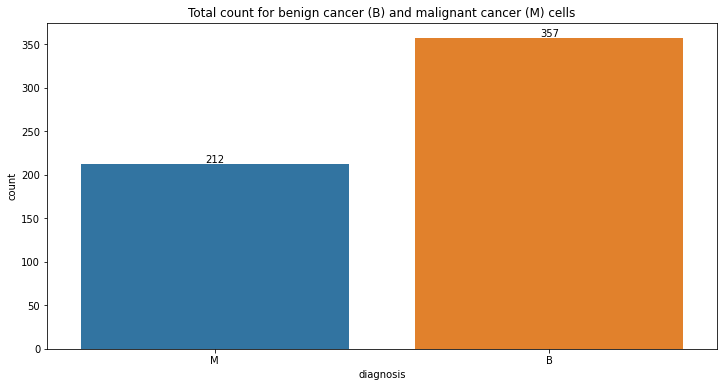

In [35]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='diagnosis')
plt.title('Total count for benign cancer (B) and malignant cancer (M) cells')
# show count value on top of the bar
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

The dataset is not fully balanced, the ratio of benign cancerand and malignant cancer is 4:7 

df.corr()

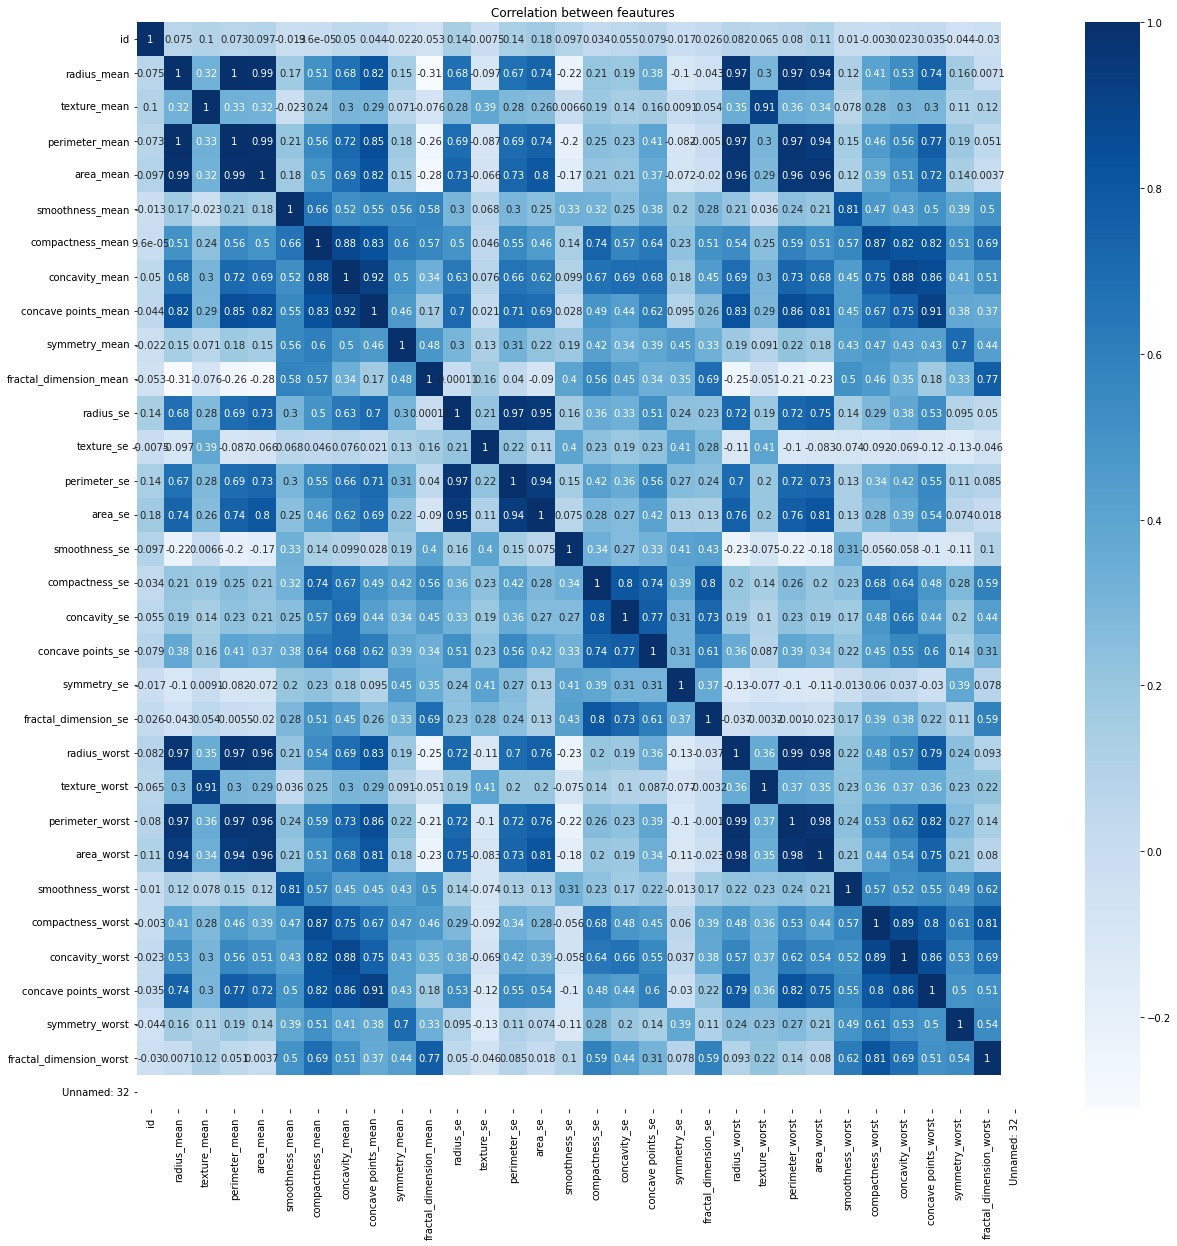

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')
plt.title("Correlation between feautures")
plt.show()

There are some features that have high corrleation with each other, such as radius_worst with radius_mean, radius_mean with area_mean.